Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
from random import Random
from numpy import log,dot,e,shape
import math
data=pd.read_csv('/content/gdrive/MyDrive/Data_set.csv')
data.head()

Mounted at /content/gdrive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dropping id and diagnosis from X and initialising Y as the output variable

In [ ]:
from random import Random
Random(14).shuffle(data.values)
print(data.shape)
# data = data.dropna()
print(data.shape)
y=data.diagnosis
x=data.drop('id',axis=1)
x=x.drop('diagnosis',axis=1)

(569, 32)
(569, 32)


Splitting into training and testing

In [ ]:
x_train=x.iloc[0:382]
x_test=x.iloc[382:]
y_train=y.iloc[0:382]
y_test=y.iloc[382:]
y_binaryTrain=np.array([1.0 if i == 'M' else 0.0 for i in y_train])
y_binaryTest=np.array([1.0 if i == 'M' else 0.0 for i in y_test])
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_binaryTrain.shape)
print(y_binaryTest.shape)

(569, 30)
(569,)
(382, 30)
(187, 30)
(382,)
(187,)
(382,)
(187,)


Feature Engineering (Normalising the data)

In [ ]:
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

x_test = standardize_data(x_test)
x_train = standardize_data(x_train)

mean1 = np.nanmean(x_train)
mean2 = np.nanmean(x_test)
# Replace NaN values with mean
x_train[np.isnan(x_train)] = mean1
x_test[np.isnan(x_test)] = mean2

Implementing logistic regression

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def model(x,y,lr,n_itr):
    # n_samples,n_features = xfe1_train.shape
    n_samples,n_features = x.shape
    W=np.zeros(n_features,dtype=np.float32)
    B=0.0
    cost_list=[]
    for i in range (n_itr):
        z = np.dot(x,W)+B
        A=sigmoid(z)
        cost = (np.sum((np.multiply(y,np.log(A))) + ((np.ones(382,)-y)*np.log(1-A)),dtype=np.float32)*(-1/n_samples))
        # Gradient Descent
        dW = (1/n_samples)*np.dot(A-y, x)
        dB = (1/n_samples)*np.sum(A-y)
        
        W = W - lr*dW
        B = B - lr*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(n_itr/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [ ]:
iterations = 1000000
learning_rate = 0.0001
W, B, cost_list = model(x_train, y_binaryTrain,learning_rate, iterations)
# W, B, cost_list = model(xfe1_train, y_,learning_rate, iterations)

cost after  0 iteration is :  0.6931471899541886
cost after  100000 iteration is :  0.10471513758155064
cost after  200000 iteration is :  0.08722239389469487
cost after  300000 iteration is :  0.07972813651199741
cost after  400000 iteration is :  0.07534326683164268
cost after  500000 iteration is :  0.07236674942895381
cost after  600000 iteration is :  0.07016156980504541
cost after  700000 iteration is :  0.06843213385936478
cost after  800000 iteration is :  0.06702118519088986
cost after  900000 iteration is :  0.06583654193978035


In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[0])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(x_test,y_binaryTest,W,B)

Accuracy of the model is :  90.37 %


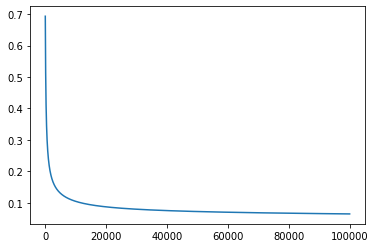

In [ ]:
plt.plot(range(iterations),cost_list)
plt.show()